In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix, f1_score, accuracy_score, mean_absolute_error

In [2]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# Data Cleaning and Preprocessing

In [5]:
# Check for missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [6]:
# Drop irrelevant columns
df.drop(columns=['day', 'month', 'year'], inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# Encoding of categories in Classes into 0(Not Fire) and 1(Fire)
df['Classes'] =np.where (df['Classes'].str.contains('not fire'),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


# Data Visualization and Observations

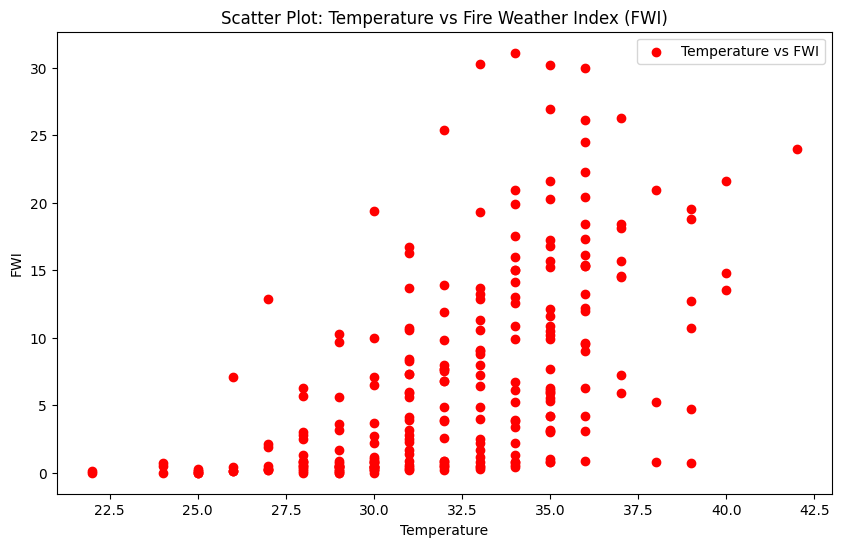

In [11]:
# Scatter Plot Temperature vs FWI
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['FWI'], color='r', label='Temperature vs FWI')
plt.xlabel('Temperature')
plt.ylabel('FWI')
plt.title('Scatter Plot: Temperature vs Fire Weather Index (FWI)')
plt.legend()
plt.show()

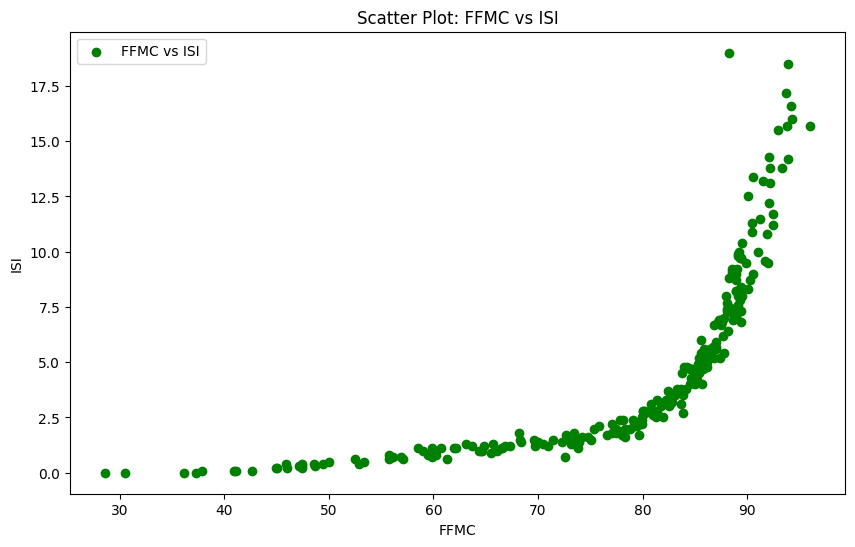

In [12]:
# Scatter Plot FFMC vs ISI
plt.figure(figsize=(10, 6))
plt.scatter(df['FFMC'], df['ISI'], color='g', label='FFMC vs ISI')
plt.xlabel('FFMC')
plt.ylabel('ISI')
plt.title('Scatter Plot: FFMC vs ISI')
plt.legend()
plt.show()

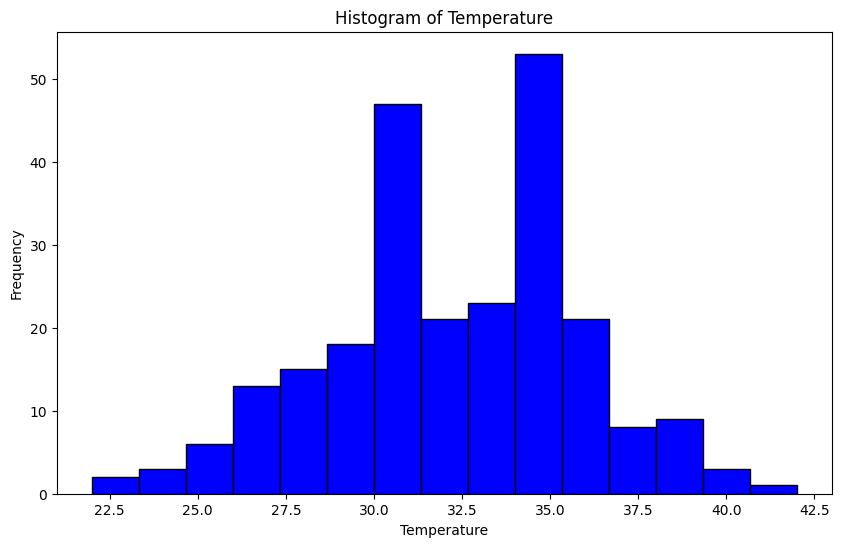

In [13]:
# Histogram: Temperature distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature'], bins=15, color='blue', edgecolor='black')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

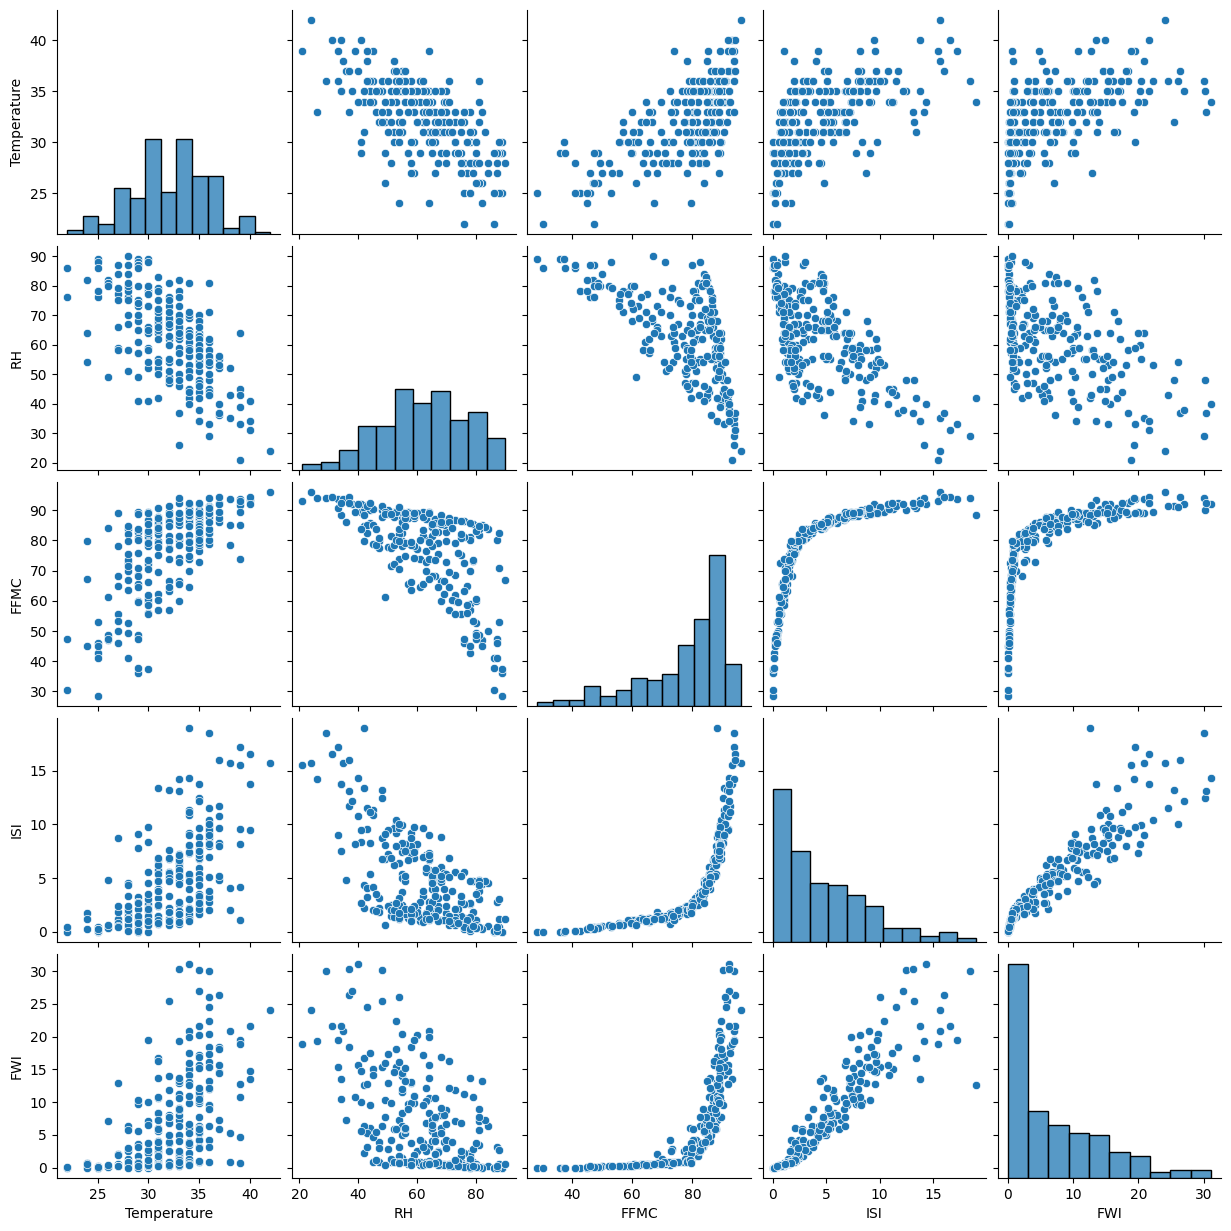

In [14]:
# Pairplot for feature relationship
sns.pairplot(df[['Temperature', 'RH', 'FFMC', 'ISI', 'FWI']])
plt.show()

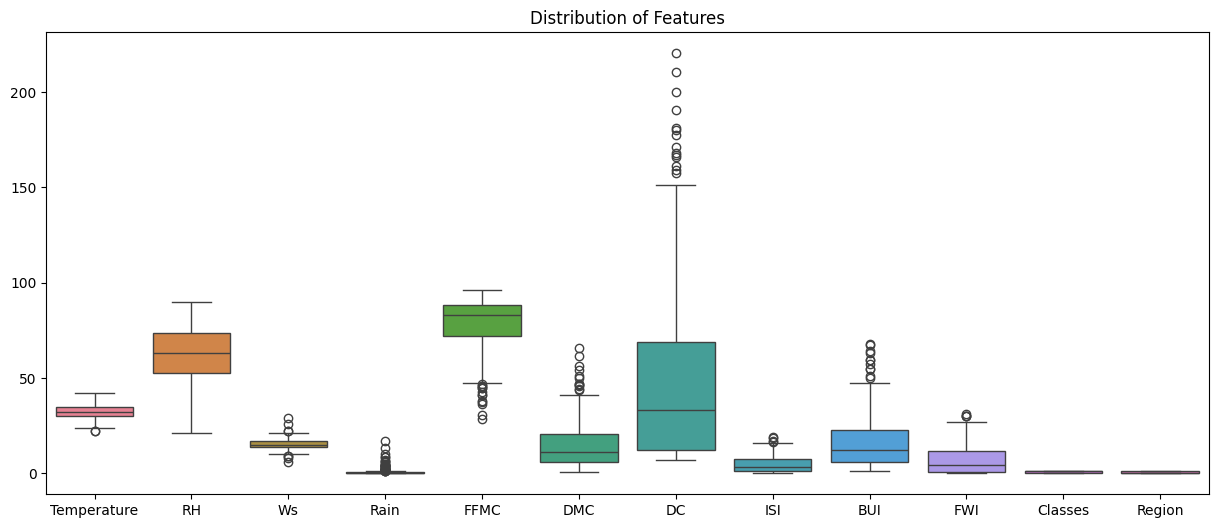

In [15]:
# Plot the feature distribution
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title('Distribution of Features')
plt.show()

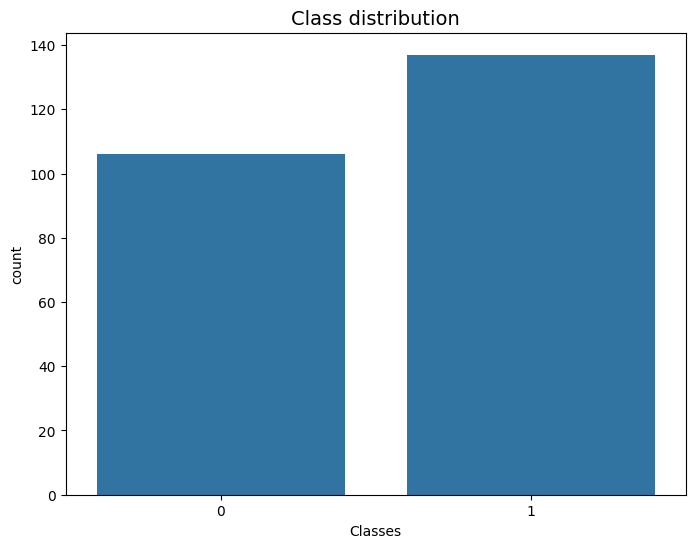

In [16]:
# Plot classes distribution

plt.figure(figsize=(8, 6))
sns.countplot(data= df , x='Classes')
plt.title('Class distribution', fontsize = 14)
plt.show()

C:\Users\Keshav Gautam\AppData\Local\Temp\ipykernel_17360\193242991.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classes', y=feature, data=df, palette=['#1f77b4', '#ff7f0e'])
C:\Users\Keshav Gautam\AppData\Local\Temp\ipykernel_17360\193242991.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classes', y=feature, data=df, palette=['#1f77b4', '#ff7f0e'])
C:\Users\Keshav Gautam\AppData\Local\Temp\ipykernel_17360\193242991.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classes', y=feature, data=df, palette=['#1f77b4', '#ff

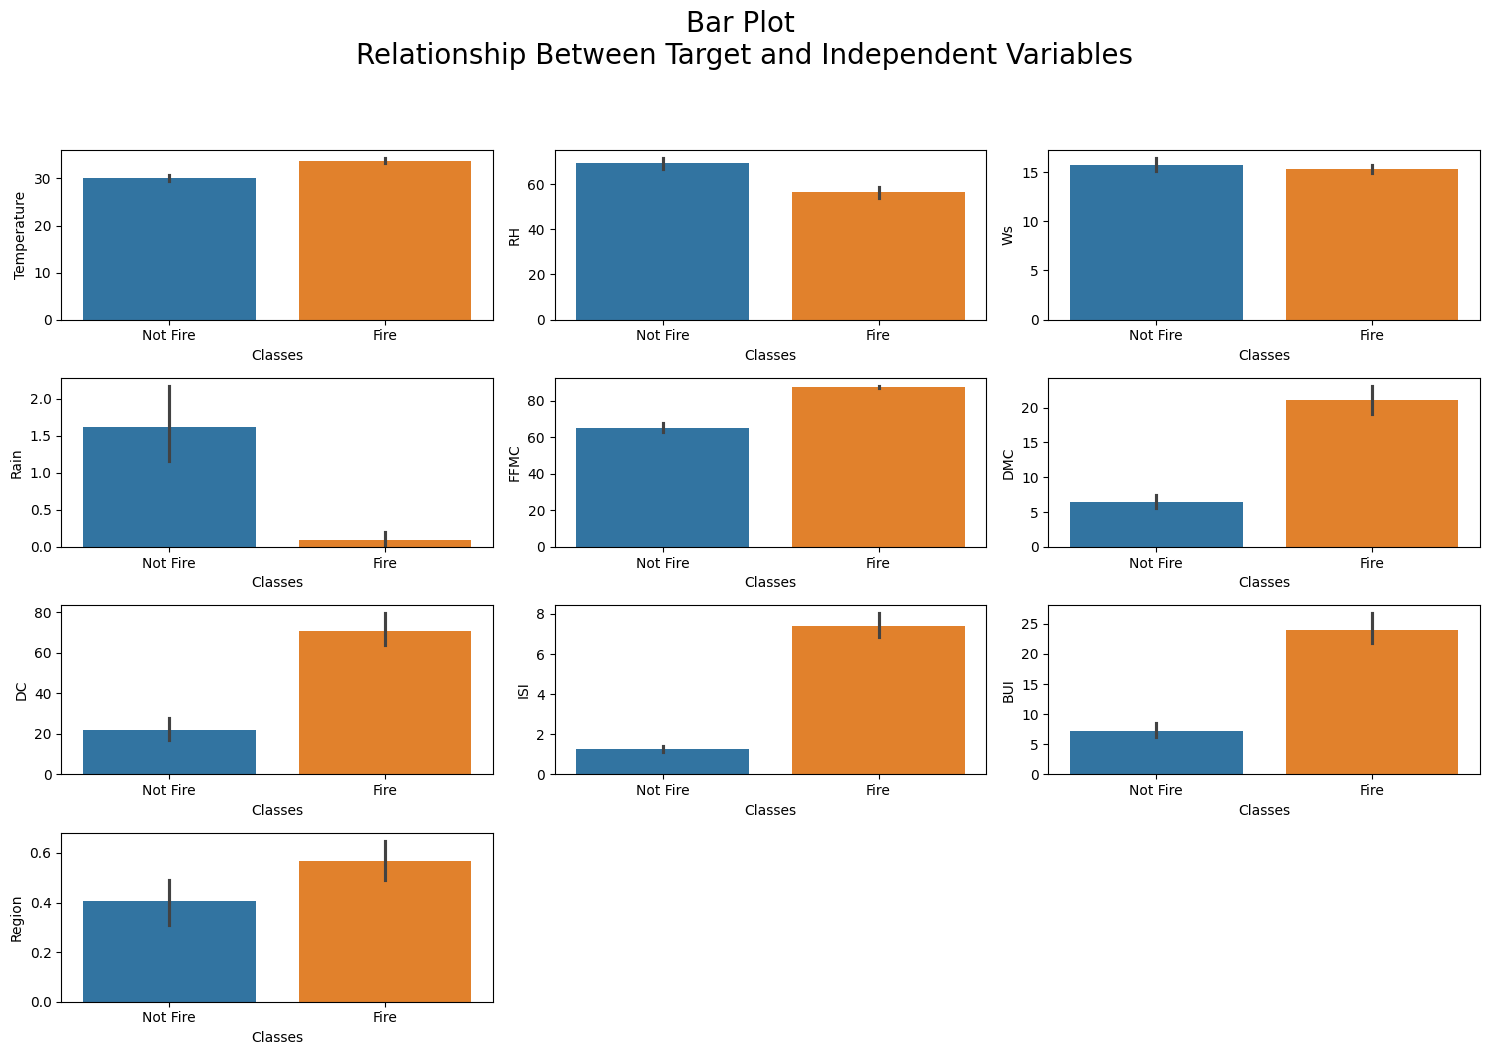

In [17]:
# Plotting the relationship between target and independent variables

plt.figure(figsize=(15, 10))
plt.suptitle('Bar Plot \nRelationship Between Target and Independent Variables', fontsize=20, alpha=1, y=1.05)

features = df.columns.drop(['FWI', 'Classes'])
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.barplot(x='Classes', y=feature, data=df, palette=['#1f77b4', '#ff7f0e'])
    plt.xticks([0, 1], ['Not Fire', 'Fire'])  # Set the x-axis labels
    plt.tight_layout()

plt.show()



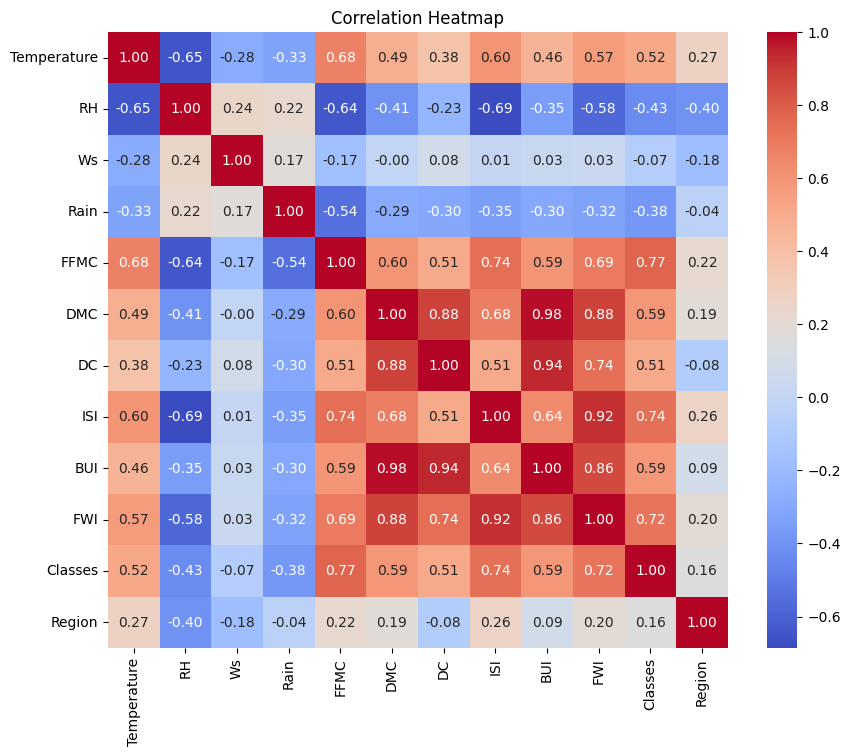

In [18]:
# Plot relation between target and independent variable (Heat Map)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

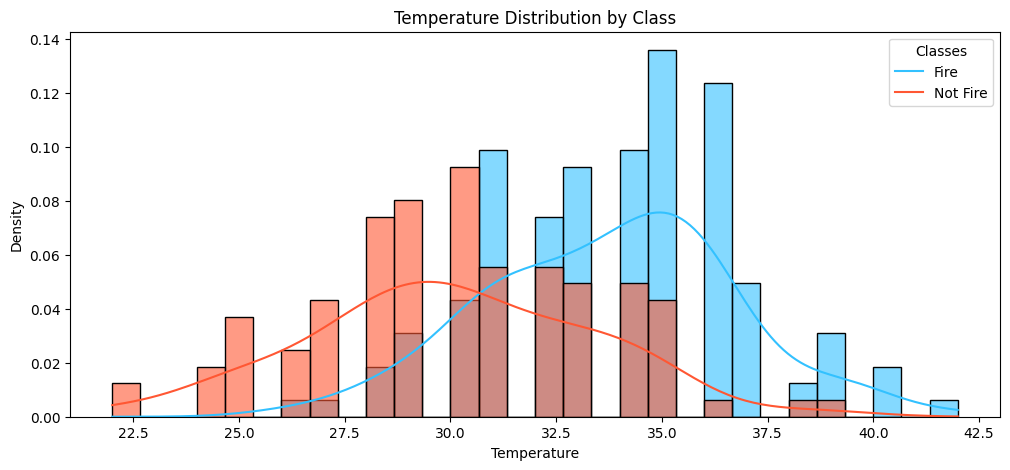

In [22]:
# Set the color palette
# sns.set_palette(['#FF5733', '#33C1FF'])  # Custom colors for the classes

# Plotting the histogram
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Temperature', hue='Classes', kde=True, stat='density', alpha=0.6, bins=30)
plt.title('Temperature Distribution by Class')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend(title='Classes', labels=['Fire', 'Not Fire'])
plt.show()

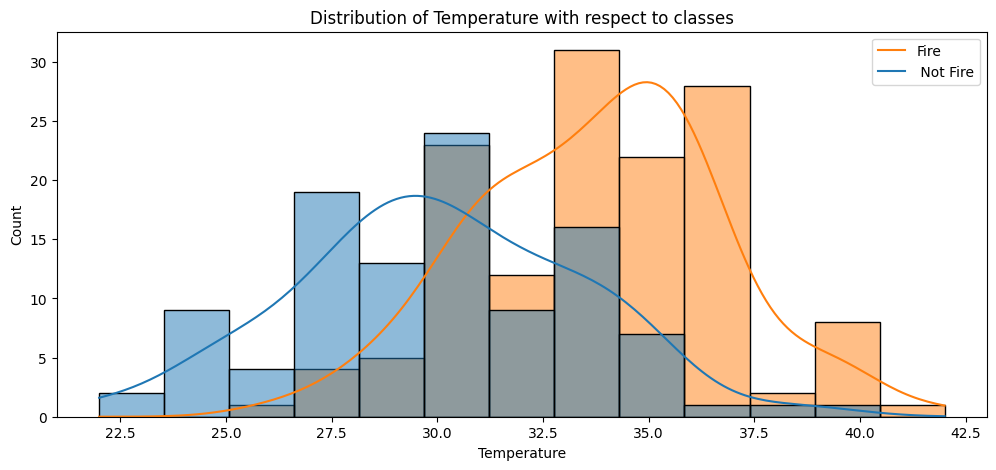

In [19]:
# Distribution of Temperature with class

plt.figure(figsize=(12, 5))
sns.histplot(data = df, x= 'Temperature', hue='Classes', kde = True)
plt.title('Distribution of Temperature with respect to classes')
plt.legend(['Fire', ' Not Fire'])
plt.show()

# Model Development and Analysis

In [20]:
# Independent & Dependent features
X = df.drop('FWI', axis=1)
y = df['FWI']
X.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [21]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(182, 11)
(61, 11)
(182,)
(61,)


# Feature selection (Multi collinearity)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

initial_vif = calculate_vif(X)
print("Initial VIF:\n", initial_vif)


Initial VIF:
         Feature         VIF
0   Temperature  109.429048
1            RH   32.236045
2            Ws   37.130416
3          Rain    1.655248
4          FFMC  114.994902
5           DMC  205.539005
6            DC   51.257576
7           ISI   11.137955
8           BUI  393.610061
9       Classes    7.064774
10       Region    3.149722


In [23]:
# Drop the feature with the highest VIF
if not initial_vif.empty:
    max_vif_feature = initial_vif.loc[initial_vif['VIF'].idxmax(), 'Feature']
    X = X.drop(max_vif_feature, axis=1)

updated_vif = calculate_vif(X)
print("Updated VIF after dropping the feature with highest VIF:\n", updated_vif)

Updated VIF after dropping the feature with highest VIF:
        Feature         VIF
0  Temperature  109.166458
1           RH   32.212117
2           Ws   37.119996
3         Rain    1.651458
4         FFMC  114.820856
5          DMC   19.565136
6           DC   13.551424
7          ISI   11.131733
8      Classes    6.944951
9       Region    3.038594


In [24]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.85)
print(corr_features)

# Drop features with correlation > 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)


{'BUI', 'DC'}
(182, 9)
(61, 9)


In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize Standard Scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Model Evaluation and Testing

# Linear Regression

Mean Absolute Error (MAE): 0.5468236465249978
R-squared score (R2): 0.9847657384266951


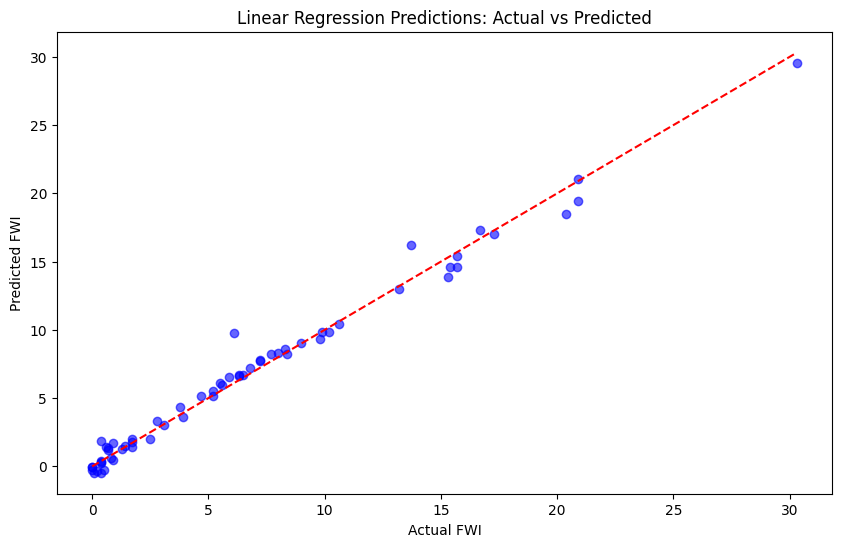

In [27]:
# Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = linreg.predict(X_test_scaled)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared score (R2): {r2}")

# Visualization: Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Linear Regression Predictions: Actual vs Predicted')
plt.show()

# Lasso Regression

Mean Absolute Error (MAE): 1.133175994914409
R-squared score (R2): 0.9492020263112388


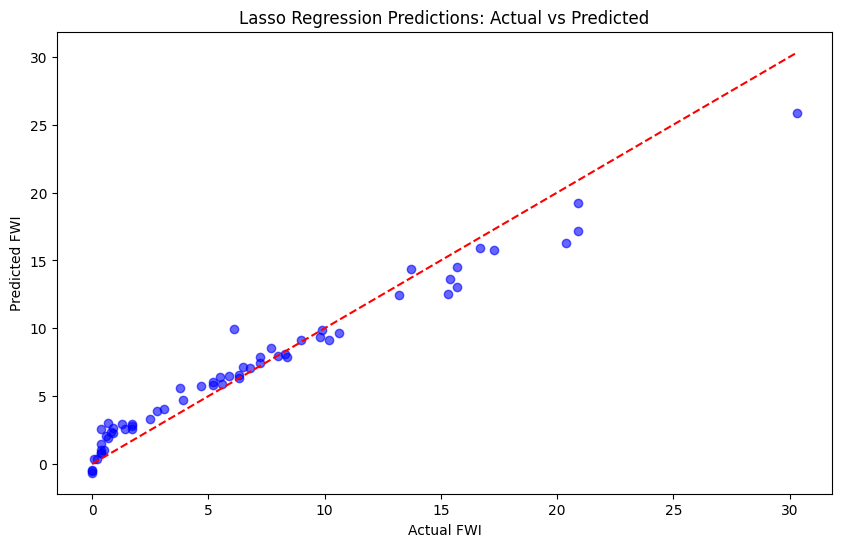

In [29]:
from sklearn.linear_model import Lasso

# Lasso Regression model
lasso = Lasso(alpha=1.0)  # Alpha is the regularization strength; you can tune this parameter
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred = lasso.predict(X_test_scaled)

# Performance metrics
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

# Output the metrics
print(f"Mean Absolute Error (MAE): {lasso_mae}")
print(f"R-squared score (R2): {lasso_r2}")

# Visualization: Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Lasso Regression Predictions: Actual vs Predicted')
plt.show()

# Hyperparameter Tuning with Cross-Validation

Best alpha using LassoCV: 0.05725391318234408
Mean Absolute Error (MAE): 0.619970115826343
R-squared score (R2): 0.9820946715928275


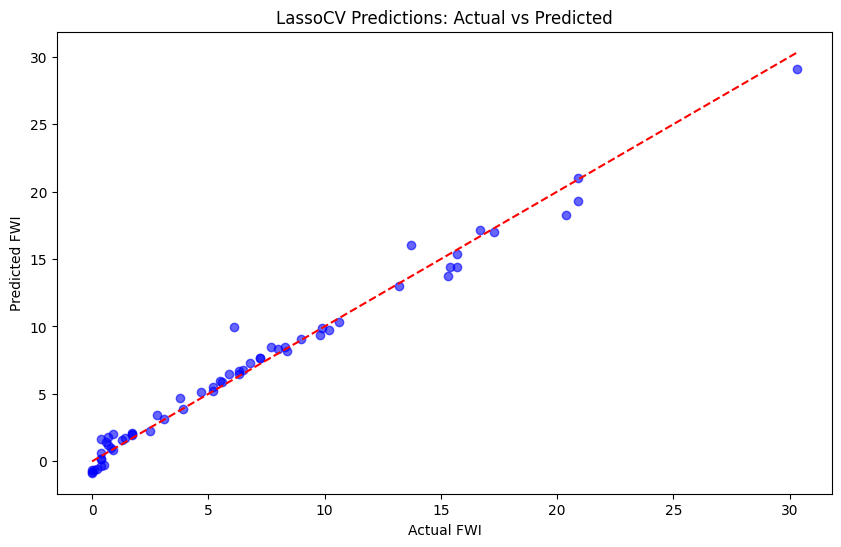

In [30]:
from sklearn.linear_model import LassoCV


# Lasso Cross-Validation with 5-fold CV
lassocv = LassoCV(cv=5, random_state=42)  # Setting random_state for reproducibility
lassocv.fit(X_train_scaled, y_train)

# Get the best alpha (regularization strength) chosen by LassoCV
lasso_cv_alpha = lassocv.alpha_
print(f"Best alpha using LassoCV: {lasso_cv_alpha}")

# Performance metrics
y_pred_cv = lassocv.predict(X_test_scaled)

lasso_cv_mae = mean_absolute_error(y_test, y_pred_cv)
lasso_cv_r2 = r2_score(y_test, y_pred_cv)

print(f"Mean Absolute Error (MAE): {lasso_cv_mae}")
print(f"R-squared score (R2): {lasso_cv_r2}")

# Visualization: Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cv, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('LassoCV Predictions: Actual vs Predicted')
plt.show()


# Ridge Regression

Mean Absolute Error (MAE): 0.5642305340105715
R-squared score (R2): 0.9842993364555512


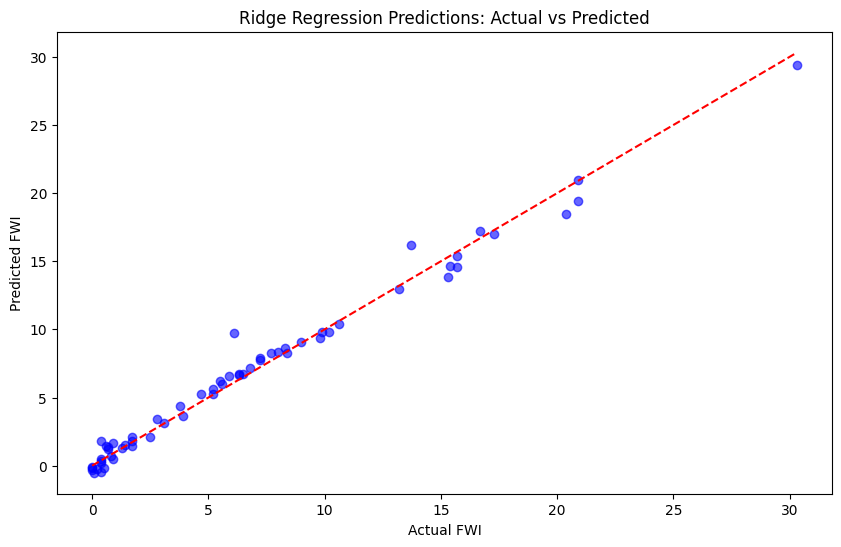

In [31]:
from sklearn.linear_model import Ridge

# Ridge Regression with default alpha (1.0)
ridge = Ridge(alpha=1.0)  # You can tune the alpha parameter to control regularization
ridge.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Performance metrics
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Output the metrics
print(f"Mean Absolute Error (MAE): {ridge_mae}")
print(f"R-squared score (R2): {ridge_r2}")

# Visualization: Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Ridge Regression Predictions: Actual vs Predicted')
plt.show()

# ElasticNet Regression

Best parameters using GridSearchCV: {'alpha': 0.01, 'l1_ratio': 0.1}
Mean Absolute Error (MAE): 0.5782161632865681
R-squared score (R2): 0.9839201005272509


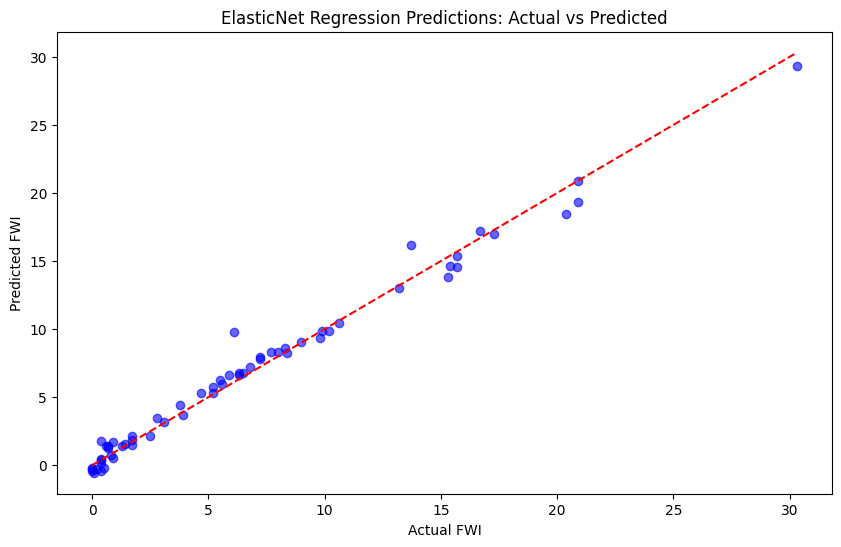

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for ElasticNet
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9]   # Balance between L1 and L2 regularization
}

# Initialize ElasticNet model
elasticnet = ElasticNet()

# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(elasticnet, param_grid, cv=5, scoring='r2')  # Scoring using R²
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model from GridSearchCV
best_params = grid_search.best_params_
best_elasticnet = grid_search.best_estimator_

# Output the best hyperparameters
print(f"Best parameters using GridSearchCV: {best_params}")

# Evaluate the best ElasticNet model on the test set
y_pred_elasticnet = best_elasticnet.predict(X_test_scaled)

# Calculate performance metrics
elasticnet_mae = mean_absolute_error(y_test, y_pred_elasticnet)
elasticnet_r2 = r2_score(y_test, y_pred_elasticnet)

# Output the performance metrics
print(f"Mean Absolute Error (MAE): {elasticnet_mae}")
print(f"R-squared score (R2): {elasticnet_r2}")

# Visualization: Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elasticnet, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('ElasticNet Regression Predictions: Actual vs Predicted')
plt.show()


# Saving the Model

In [39]:
import pickle

# Save the scaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Save the Linear Regression model
linreg_filename = 'linreg_model.pkl'
with open(linreg_filename, 'wb') as file:
    pickle.dump(linreg, file)

# Save the Lasso Regression model
lasso_filename = 'lasso_model.pkl'
with open(lasso_filename, 'wb') as file:
    pickle.dump(lasso, file)

# Save the Ridge Regression model
ridge_filename = 'ridge_model.pkl'
with open(ridge_filename, 'wb') as file:
    pickle.dump(ridge, file)

# Save the ElasticNet model
elasticnet_filename = 'elasticnet_model.pkl'
with open(elasticnet_filename, 'wb') as file:
    pickle.dump(best_elasticnet, file)

# Model Testing

In [40]:
# Load the scaler and models
with open(scaler_filename, 'rb') as file:
    loaded_scaler = pickle.load(file)

with open(linreg_filename, 'rb') as file:
    loaded_linreg = pickle.load(file)

with open(lasso_filename, 'rb') as file:
    loaded_lasso = pickle.load(file)

with open(ridge_filename, 'rb') as file:
    loaded_ridge = pickle.load(file)

with open(elasticnet_filename, 'rb') as file:
    loaded_elasticnet = pickle.load(file)

with open(elasticnet_filename, 'rb') as file:
    loaded_elasticnet = pickle.load(file)

# Define new unseen data
new_data = pd.DataFrame({
    'Temperature': [20],
    'RH': [45],
    'Ws': [20],
    'Rain': [0.9],
    'FFMC': [85],
    'DMC': [6],
    'ISI': [8],
    'Classes': [0],
    'Region': [0]
})

# Scale the new data
new_data_scaled = loaded_scaler.transform(new_data)

# Predict with all models
linreg_pred = loaded_linreg.predict(new_data_scaled)
lasso_pred = loaded_lasso.predict(new_data_scaled)
ridge_pred = loaded_ridge.predict(new_data_scaled)
elasticnet_pred = loaded_elasticnet.predict(new_data_scaled)

print(f"Linear Regression Prediction for FWI: {linreg_pred[0]}")
print(f"Lasso Regression Prediction for FWI: {lasso_pred[0]}")
print(f"Ridge Regression Prediction for FWI: {ridge_pred[0]}")
print(f"ElasticNet Prediction for FWI: {elasticnet_pred[0]}")


Linear Regression Prediction for FWI: 8.007822475968226
Lasso Regression Prediction for FWI: 8.036299238324398
Ridge Regression Prediction for FWI: 7.962006734788058
ElasticNet Prediction for FWI: 7.930846020976213
